In [87]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min


In [88]:
names = ["Day"]
for i in range(38):
    names.append('Column'+str(i))
    

In [89]:
data = pd.read_csv('water-treatment.data', names=names)

In [90]:
days = data['Day'].values
data = data.drop(['Day'], axis = 1)

In [91]:
pd.set_option('display.max_columns', 100)
data

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,?,228,70.2,5.5,2120,7.9,?,280,94,72.3,0.3,2010,7.3,?,84,21,81.0,0.02,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,?,244,75.4,7.7,2570,7.6,?,474,96,79.2,0.4,2700,7.5,?,91,17,94.1,0.00,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,?,220,72.7,4.5,1594,7.7,?,272,92,78.3,0.2,1742,7.6,?,128,21,81,0.05,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,236,268,73.1,8.5,2280,7.8,158,376,96,77.1,0.4,2060,7.6,20,104,20,96.7,0.00,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,?,236,57.6,4.5,2020,7.8,?,372,88,68.2,0.2,2250,7.6,19,108,22,65.9,0.02,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
5,38572,3.00,7.8,202,372,186,68.8,4.5,1644,7.8,?,248,66.1,8.5,1762,7.7,150,460,100,76.0,0.3,1768,7.5,20,100,28,82.1,0.00,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
6,41115,6.00,7.8,?,552,262,64.1,5.0,1603,7.8,?,320,67.5,6.5,1608,7.8,192,376,122,72.1,0.4,1668,7.5,21,76,26,84.6,0.05,1703,?,61.9,93.8,89.1,79.8,?,86.2,90.1,99.0
7,36107,5.00,7.7,215,489,334,40.7,6.0,1613,7.6,?,304,53.9,8.0,1557,7.6,181,350,90,71.1,0.4,1596,7.5,17,162,18,66.7,0.00,1606,?,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100
8,29156,2.50,7.7,206,451,194,69.1,4.5,1249,7.7,206,220,61.8,4.0,1219,7.7,111,282,124,77.4,0.3,1233,7.5,16,118,19,84.2,0.03,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,39246,2.00,7.8,172,506,200,69.0,5.0,1865,7.8,208,248,66.1,6.5,1929,7.8,164,463,100,78.0,0.6,1825,7.6,19,157,27,87.0,0.02,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6


In [92]:
data = data.replace('?', np.nan)

In [93]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Column29,62,0.117647
Column32,40,0.075901
Column10,40,0.075901
Column34,36,0.068311
Column37,31,0.058824
Column27,28,0.053131
Column16,28,0.053131
Column31,27,0.051233
Column33,26,0.049336
Column20,25,0.047438


In [94]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column])

In [95]:
for column in missing_data.index[:31]:
    data[column] = data[column].fillna(data[column].mean())

In [96]:
data.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
Column22    0
Column23    0
Column24    0
Column25    0
Column26    0
Column27    0
Column28    0
Column29    0
Column30    0
Column31    0
Column32    0
Column33    0
Column34    0
Column35    0
Column36    0
Column37    0
dtype: int64

In [97]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(data)
    inertia.append(algorithm.inertia_)

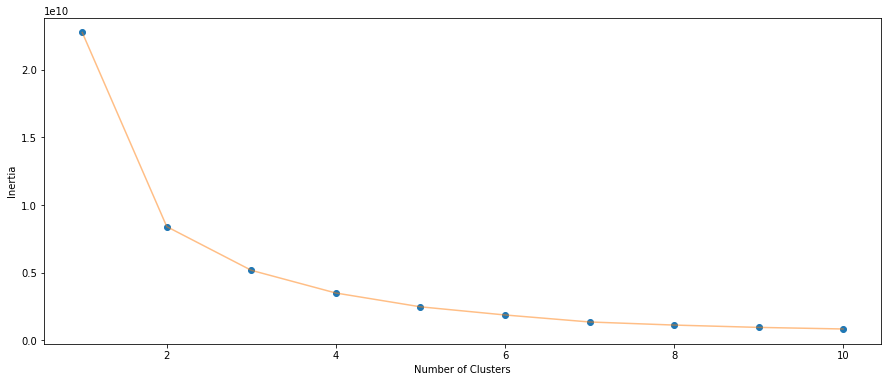

In [98]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [99]:
k_means = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
k_means.fit(data)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

In [100]:
k_means_cluster_centers = k_means.cluster_centers_
labels = k_means.labels_

In [101]:
metrics.silhouette_score(data, labels, metric='euclidean')

0.4820161985041185

In [102]:
data.insert(loc=0, column='Days', value=days)
data.insert(loc=1, column='Classes [0:3]', value=labels)

In [103]:
data

,Days,Classes [0:3],Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,D-1/3/90,2,44101.0,1.500000,7.8,188.714286,407.0,166.0,66.3,4.500000,2110,7.9,206.207392,228,70.2,5.500000,2120,7.9,122.348697,280.000000,94.0,72.3,0.300000,2010,7.3,19.988095,84.000000,21.0,81.0,0.020000,2000.0,39.085806,58.800000,95.5000,83.448049,70.000000,89.013646,79.400000,87.300000,99.60000
1,D-2/3/90,2,39024.0,3.000000,7.7,188.714286,443.0,214.0,69.2,6.500000,2660,7.7,206.207392,244,75.4,7.700000,2570,7.6,122.348697,474.000000,96.0,79.2,0.400000,2700,7.5,19.988095,91.000000,17.0,94.1,0.000000,2590.0,39.085806,60.700000,94.8000,83.448049,80.800000,89.013646,79.500000,92.100000,100.00000
2,D-4/3/90,0,32229.0,5.000000,7.6,188.714286,528.0,186.0,69.9,3.400000,1666,7.7,206.207392,220,72.7,4.500000,1594,7.7,122.348697,272.000000,92.0,78.3,0.200000,1742,7.6,19.988095,128.000000,21.0,81.0,0.050000,1888.0,39.085806,58.200000,95.6000,83.448049,52.900000,89.013646,75.800000,88.700000,98.50000
3,D-5/3/90,0,35023.0,3.500000,7.9,205.000000,588.0,192.0,65.6,4.500000,2430,7.8,236.000000,268,73.1,8.500000,2280,7.8,158.000000,376.000000,96.0,77.1,0.400000,2060,7.6,20.000000,104.000000,20.0,96.7,0.000000,1840.0,33.100000,64.200000,95.3000,87.300000,72.300000,90.200000,82.300000,89.600000,100.00000
4,D-6/3/90,0,36924.0,1.500000,8.0,242.000000,496.0,176.0,64.8,4.000000,2110,7.9,206.207392,236,57.6,4.500000,2020,7.8,122.348697,372.000000,88.0,68.2,0.200000,2250,7.6,19.000000,108.000000,22.0,65.9,0.020000,2120.0,39.085806,62.700000,95.6000,83.448049,71.000000,92.100000,78.200000,87.500000,99.50000
5,D-7/3/90,2,38572.0,3.000000,7.8,202.000000,372.0,186.0,68.8,4.500000,1644,7.8,206.207392,248,66.1,8.500000,1762,7.7,150.000000,460.000000,100.0,76.0,0.300000,1768,7.5,20.000000,100.000000,28.0,82.1,0.000000,1764.0,39.085806,59.700000,96.5000,86.700000,78.300000,90.100000,73.100000,84.900000,100.00000
6,D-8/3/90,2,41115.0,6.000000,7.8,188.714286,552.0,262.0,64.1,5.000000,1603,7.8,206.207392,320,67.5,6.500000,1608,7.8,192.000000,376.000000,122.0,72.1,0.400000,1668,7.5,21.000000,76.000000,26.0,84.6,0.050000,1703.0,39.085806,61.900000,93.8000,89.100000,79.800000,89.013646,86.200000,90.100000,99.00000
7,D-9/3/90,0,36107.0,5.000000,7.7,215.000000,489.0,334.0,40.7,6.000000,1613,7.6,206.207392,304,53.9,8.000000,1557,7.6,181.000000,350.000000,90.0,71.1,0.400000,1596,7.5,17.000000,162.000000,18.0,66.7,0.000000,1606.0,39.085806,70.400000,95.6000,90.600000,53.700000,92.100000,66.900000,94.600000,100.00000
8,D-11/3/90,3,29156.0,2.500000,7.7,206.000000,451.0,194.0,69.1,4.500000,1249,7.7,206.000000,220,61.8,4.000000,1219,7.7,111.000000,282.000000,124.0,77.4,0.300000,1233,7.5,16.000000,118.000000,19.0,84.2,0.030000,1338.0,46.100000,43.600000,92.5000,85.600000,58.200000,92.200000,73.800000,90.200000,99.40000
9,D-12/3/90,2,39246.0,2.000000,7.8,172.000000,506.0,200.0,69.0,5.000000,1865,7.8,208.000000,248,66.1,6.500000,1929,7.8,164.000000,463.000000,100.0,78.0,0.600000,1825,7.6,19.000000,157.000000,27.0,87.0,0.020000,1616.0,21.200000,59.700000,90.8000,88.400000,66.100000,89.000000,69.000000,86.500000,99.60000


In [104]:
k_means_cluster_centers

array([[3.49965712e+04, 2.57798821e+00, 7.77951807e+00, 1.94974756e+02,
        4.39661016e+02, 2.34921465e+02, 6.31332516e+01, 4.92292117e+00,
        1.50339759e+03, 7.80963855e+00, 2.15304149e+02, 2.60369478e+02,
        6.19080765e+01, 5.35342962e+00, 1.51828916e+03, 7.80080321e+00,
        1.27364617e+02, 2.85772201e+02, 9.57438745e+01, 7.47529073e+01,
        4.30325285e-01, 1.51512048e+03, 7.70040161e+00, 2.03570950e+01,
        9.09187477e+01, 2.23512902e+01, 8.06889913e+01, 2.76433188e-02,
        1.51537349e+03, 3.89567509e+01, 5.98117971e+01, 9.13520771e+01,
        8.32830229e+01, 6.80790107e+01, 8.90405263e+01, 7.87745612e+01,
        8.95182874e+01, 9.93444455e+01],
       [4.95030508e+04, 2.20761127e+00, 7.89152542e+00, 1.57975787e+02,
        3.01627119e+02, 2.06338983e+02, 5.36661017e+01, 3.41853940e+00,
        1.40610169e+03, 7.91186441e+00, 1.72343125e+02, 2.30372881e+02,
        5.23000000e+01, 3.59717963e+00, 1.43206780e+03, 7.86610169e+00,
        1.06086308e+02,

In [105]:
data_index = data.drop(['Days', 'Classes [0:3]'], axis=1)

In [106]:
closest, _ = pairwise_distances_argmin_min(k_means_cluster_centers, data_index)

In [107]:
center_1 = data['Days'][closest[0]]
center_2 = data['Days'][closest[1]]
center_3 = data['Days'][closest[2]]
center_4 = data['Days'][closest[3]]

In [108]:
# Classifications of the centers:
#center_1: 0 = Low-Mid
#Center_2: 1 = High
#Center_3: 2 = Mid-High
#Center_4: 3 = Low

In [110]:
data.insert(loc=2, column='Classes [Low:High]', value=data['Classes [0:3]'])

In [121]:
data['Classes [Low:High]'] = data['Classes [Low:High]'].replace([0, 1, 2, 3], ['Low-Mid', 'High', 'Mid-High', 'Low'])

In [122]:
data

,Days,Classes [0:3],Classes [Low:High],Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,D-1/3/90,2,Mid-High,44101.0,1.500000,7.8,188.714286,407.0,166.0,66.3,4.500000,2110,7.9,206.207392,228,70.2,5.500000,2120,7.9,122.348697,280.000000,94.0,72.3,0.300000,2010,7.3,19.988095,84.000000,21.0,81.0,0.020000,2000.0,39.085806,58.800000,95.5000,83.448049,70.000000,89.013646,79.400000,87.300000,99.60000
1,D-2/3/90,2,Mid-High,39024.0,3.000000,7.7,188.714286,443.0,214.0,69.2,6.500000,2660,7.7,206.207392,244,75.4,7.700000,2570,7.6,122.348697,474.000000,96.0,79.2,0.400000,2700,7.5,19.988095,91.000000,17.0,94.1,0.000000,2590.0,39.085806,60.700000,94.8000,83.448049,80.800000,89.013646,79.500000,92.100000,100.00000
2,D-4/3/90,0,Low-Mid,32229.0,5.000000,7.6,188.714286,528.0,186.0,69.9,3.400000,1666,7.7,206.207392,220,72.7,4.500000,1594,7.7,122.348697,272.000000,92.0,78.3,0.200000,1742,7.6,19.988095,128.000000,21.0,81.0,0.050000,1888.0,39.085806,58.200000,95.6000,83.448049,52.900000,89.013646,75.800000,88.700000,98.50000
3,D-5/3/90,0,Low-Mid,35023.0,3.500000,7.9,205.000000,588.0,192.0,65.6,4.500000,2430,7.8,236.000000,268,73.1,8.500000,2280,7.8,158.000000,376.000000,96.0,77.1,0.400000,2060,7.6,20.000000,104.000000,20.0,96.7,0.000000,1840.0,33.100000,64.200000,95.3000,87.300000,72.300000,90.200000,82.300000,89.600000,100.00000
4,D-6/3/90,0,Low-Mid,36924.0,1.500000,8.0,242.000000,496.0,176.0,64.8,4.000000,2110,7.9,206.207392,236,57.6,4.500000,2020,7.8,122.348697,372.000000,88.0,68.2,0.200000,2250,7.6,19.000000,108.000000,22.0,65.9,0.020000,2120.0,39.085806,62.700000,95.6000,83.448049,71.000000,92.100000,78.200000,87.500000,99.50000
5,D-7/3/90,2,Mid-High,38572.0,3.000000,7.8,202.000000,372.0,186.0,68.8,4.500000,1644,7.8,206.207392,248,66.1,8.500000,1762,7.7,150.000000,460.000000,100.0,76.0,0.300000,1768,7.5,20.000000,100.000000,28.0,82.1,0.000000,1764.0,39.085806,59.700000,96.5000,86.700000,78.300000,90.100000,73.100000,84.900000,100.00000
6,D-8/3/90,2,Mid-High,41115.0,6.000000,7.8,188.714286,552.0,262.0,64.1,5.000000,1603,7.8,206.207392,320,67.5,6.500000,1608,7.8,192.000000,376.000000,122.0,72.1,0.400000,1668,7.5,21.000000,76.000000,26.0,84.6,0.050000,1703.0,39.085806,61.900000,93.8000,89.100000,79.800000,89.013646,86.200000,90.100000,99.00000
7,D-9/3/90,0,Low-Mid,36107.0,5.000000,7.7,215.000000,489.0,334.0,40.7,6.000000,1613,7.6,206.207392,304,53.9,8.000000,1557,7.6,181.000000,350.000000,90.0,71.1,0.400000,1596,7.5,17.000000,162.000000,18.0,66.7,0.000000,1606.0,39.085806,70.400000,95.6000,90.600000,53.700000,92.100000,66.900000,94.600000,100.00000
8,D-11/3/90,3,Low,29156.0,2.500000,7.7,206.000000,451.0,194.0,69.1,4.500000,1249,7.7,206.000000,220,61.8,4.000000,1219,7.7,111.000000,282.000000,124.0,77.4,0.300000,1233,7.5,16.000000,118.000000,19.0,84.2,0.030000,1338.0,46.100000,43.600000,92.5000,85.600000,58.200000,92.200000,73.800000,90.200000,99.40000
9,D-12/3/90,2,Mid-High,39246.0,2.000000,7.8,172.000000,506.0,200.0,69.0,5.000000,1865,7.8,208.000000,248,66.1,6.500000,1929,7.8,164.000000,463.000000,100.0,78.0,0.600000,1825,7.6,19.000000,157.000000,27.0,87.0,0.020000,1616.0,21.200000,59.700000,90.8000,88.400000,66.100000,89.000000,69.000000,86.500000,99.60000


In [123]:
data.to_csv('Water_Plant_Classified_Data.csv',index=False)